<a href="https://colab.research.google.com/github/efemeryczny/banking_network_analysis/blob/main/directors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
excel_file_path = '/content/drive/MyDrive/Colab Notebooks/Google_drive/dyrektorzy.xlsx'
data = pd.read_excel(excel_file_path)
data

,Company,Director,Ticker
0,POLSKI KONCERN NAFTOWY ORLEN SA.,Daniel Obajtek,PKN
1,POLSKI KONCERN NAFTOWY ORLEN SA.,Wojciech Jasinski,PKN
2,POLSKI KONCERN NAFTOWY ORLEN SA.,Andrzej Szumanski,PKN
3,POLSKI KONCERN NAFTOWY ORLEN SA.,Kazimiera Janina Goss,PKN
4,POLSKI KONCERN NAFTOWY ORLEN SA.,Barbara Jarzembowska,PKN
...,...,...,...
6653,MILKILAND N.V.,Pavlo Mykhaylovych Sheremeta,MLK
6654,MILKILAND N.V.,Vitaliy Strukov,MLK
6655,MILKILAND N.V.,Willem Scato van Walt Meijer,MLK
6656,MILKILAND N.V.,Pavlo Igorovych Yokhym,MLK


In [12]:
# Create a directed graph
G = nx.DiGraph()

# Iterate through the data and add nodes and edges to the graph
for _, row in data.iterrows():
    company = row['Company']
    director = row['Director']
    G.add_node(company)
    G.add_node(director)
    G.add_edge(director, company)

# Print some basic information about the network
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 6069
Number of edges: 6658


Graph density: 0.00018079277932430096


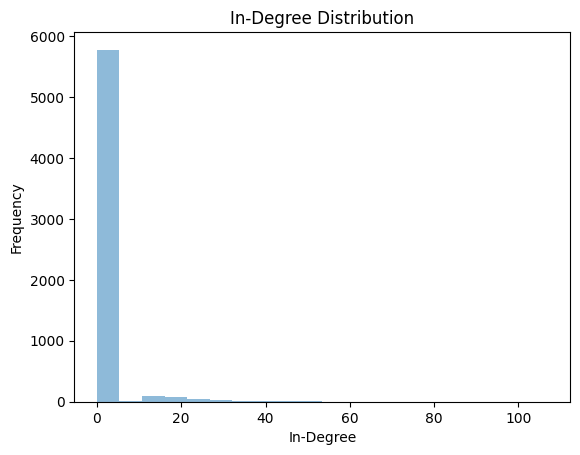

                          Director  Number of Edges
0                   Daniel Obajtek                2
1                Wojciech Jasinski                2
2                Andrzej Szumanski                2
3            Kazimiera Janina Goss                3
4             Barbara Jarzembowska                1
...                            ...              ...
5769  Pavlo Mykhaylovych Sheremeta                1
5770               Vitaliy Strukov                1
5771  Willem Scato van Walt Meijer                1
5772        Pavlo Igorovych Yokhym                1
5773            Anatoliy Yurkevych                1

[5774 rows x 2 columns]


In [18]:
# Calculate the density of the graph
density = nx.density(G)
print("Graph density:", density)

# Calculate and plot the degree distribution
degree_sequence = [d for n, d in G.in_degree()]  # You can also use out_degree for out-degrees
plt.hist(degree_sequence, bins=20, alpha=0.5)
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.title('In-Degree Distribution')
plt.show()

# Visualize the graph
#pos = nx.spring_layout(G, seed=42)  # You can choose a layout algorithm that suits your needs
#nx.draw(G, pos, with_labels=False, node_size=50, font_size=8)
#plt.title('Directed Graph')
#plt.show()

# Create a dictionary to store director names and their corresponding in-degrees (number of edges)
directors_info = {'Director': [], 'Number of Edges': []}

# Iterate through the nodes in the graph
for node in G.nodes():
    out_degree = G.out_degree(node)

    # Check if the node represents a director (you may need to adapt this based on your data)
    if out_degree > 0:
        directors_info['Director'].append(node)
        directors_info['Number of Edges'].append(out_degree)

# Create a DataFrame from the directors_info dictionary
directors_df = pd.DataFrame(directors_info)

# Display the directors and their number of edges
print(directors_df)

In [17]:
# Create a dictionary to store director names and their corresponding out-degrees (number of out-edges)
directors_info = {'Director': [], 'Number of Out-Edges': []}

# Iterate through the nodes in the graph
for node in G.nodes():
    out_degree = G.out_degree(node)

    # Check if the node represents a director and has more than one out-edge
    if out_degree > 1:
        directors_info['Director'].append(node)
        directors_info['Number of Out-Edges'].append(out_degree)

# Create a DataFrame from the directors_info dictionary
directors_df = pd.DataFrame(directors_info)

# Sort the DataFrame in ascending order based on the number of out-edges
directors_df = directors_df.sort_values(by='Number of Out-Edges', ascending=True)

# Print directors with more than one out-edge
print(directors_df)

                            Director  Number of Out-Edges
0                     Daniel Obajtek                    2
379                   Grzegorz Janas                    2
378                     Piotr Gawrys                    2
377               Maciej Jakub Nowak                    2
376         Piotr Mikolaj Wisniewski                    2
..                               ...                  ...
141                       Zofia Dzik                    7
183            Piotr Maciej Kaminski                    7
118                  Maciej Matusiak                    8
172               Tadeusz Wesolowski                    8
247  Krzysztof Stanislaw Kaczmarczyk                   12

[596 rows x 2 columns]
